####CSE523 Machine Learning 
####Project Code - Group 7, Discover Decipher 
####Title : Prediction of CO2 Emission for vehicles using Machine Learning Algorithms. 
The file includes the explanatory data analysis amonf the feature variaables and CO2 emissions 

###Libraries

In [198]:
#libraries here used are : pandas , seaborn , sklearn , numpy etc.
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

###Data Read and clean 

Data Reading / Importing Data
head values , info - datatype , columns

Null Values : No Null values are found

Missing values : NA, N/A, na, --, NAN, n/a : no such values

Duplicate values : 1103 duplicates out of 7385 : drop the duplicate values


In [199]:
#Read the dataset from csv file obtained from a known platform kaggle - curated by candian government 
dataset = pd.read_csv('CO2 Emissions_dataset.csv')
#Drop all the duplicates in the dataset 
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [200]:
#check the read dataset
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2


In [201]:
#check if dataset has null values
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
classify                            0
dtype: int64

In [202]:
#check if dataset has any duplicate values
dataset.duplicated().sum()

1103

In [203]:
#Rename the required column 
dataset.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [204]:
#Putting different transmission sub-catagories into their respective catagories
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['M5','M6','M7']),'Manual',dataset['Transmission'])

In [205]:
# Renaming fuel types for better understanding
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='X','Regular gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='Z','Premium gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='E','Ethanol',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='D','Diesel',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='N','Natural gas',dataset['Fuel Type'])

In [206]:
#check the missing values 
missing_values = ["n/a", "na", "--","NA","NAN","N/A"]

In [207]:
#check the misisng values
pd.read_csv("CO2 Emissions_dataset.csv", na_values = missing_values)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [208]:
#drop duplicates 
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2


In [209]:
#check if any duplicates 
dataset.duplicated().sum()

1112

###Feature Engineering 

In [210]:
#check the unique values of the non numerical data entries
print(dataset['Make'].value_counts())
print(dataset['Model'].value_counts())
print(dataset['Vehicle Class'].value_counts())
print(dataset['Transmission'].value_counts())
print(dataset['Fuel Type'].value_counts())

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV   

In [211]:
#0 1 2 - encoding of all the columns - rather than adding columns 
make_freq = dataset['Make'].value_counts().to_dict()
model_freq = dataset['Model'].value_counts().to_dict()
vehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
fuel_freq = dataset['Fuel Type'].value_counts().to_dict()
trans_freq = dataset['Transmission'].value_counts().to_dict()
dataset['Make'] = dataset['Make'].map(make_freq)
dataset['Model'] = dataset['Model'].map(model_freq)
dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
dataset['Fuel Type'] = dataset['Fuel Type'].map(fuel_freq)
dataset['Transmission'] = dataset['Transmission'].map(trans_freq)

In [212]:
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33,196,1
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29,221,2
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48,136,1
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25,255,2
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27,244,2


In [213]:
dataset.shape

(7385, 13)

In [214]:
dataset.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify '],
      dtype='object')

In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   int64  
 2   Vehicle Class                     7385 non-null   int64  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int64  
 6   Fuel Type                         7385 non-null   int64  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
 12  classi

In [216]:
dataset.keys()

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify '],
      dtype='object')

### Split Data and Scale

In [217]:
X = dataset.drop(['CO2_emission', 'classify '], axis = 1)#dropping data values
X.head()#checking the read data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


In [218]:
y = dataset['CO2_emission']
yc = dataset['classify ']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train, X_test, Yc_train, Yc_test = train_test_split(X, yc, test_size=0.2, random_state =0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X.head()#checking the read data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


###Explanatory Data analysis
Outliers : using Box plot : not so evident outliers in features outliers in CO2 emission but that are values to be predicted can use scatter plot, quatile range for outliers

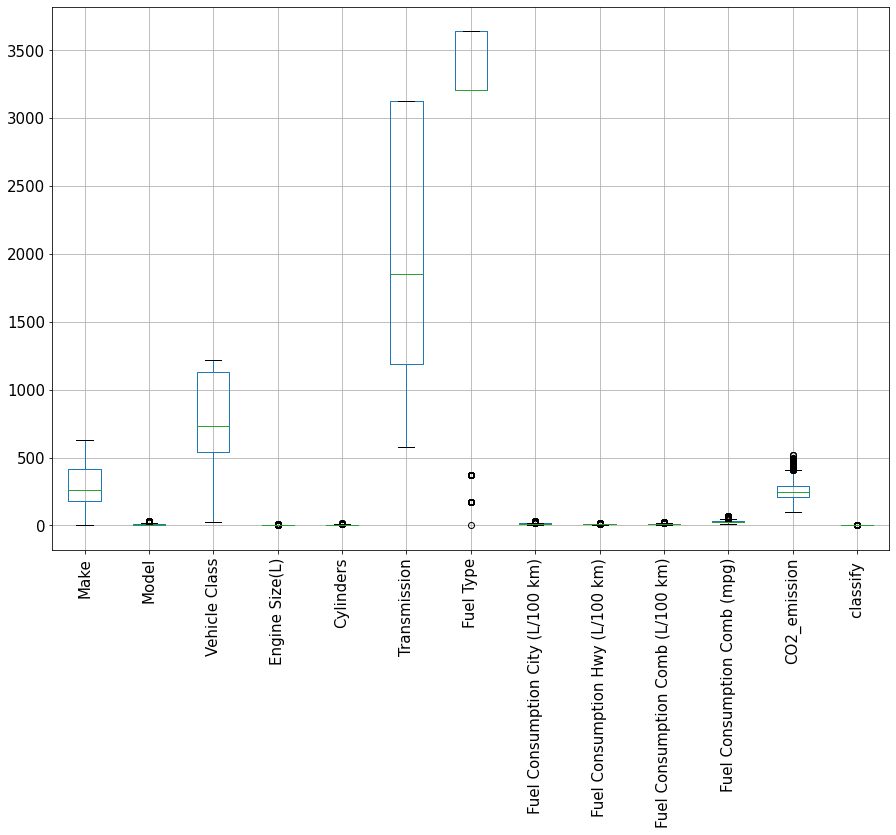

In [219]:
dataset.boxplot(figsize=(15,10),rot=90, fontsize = 15)#plotting box plot showing outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



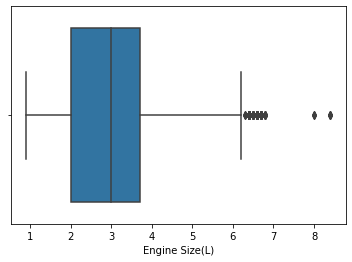

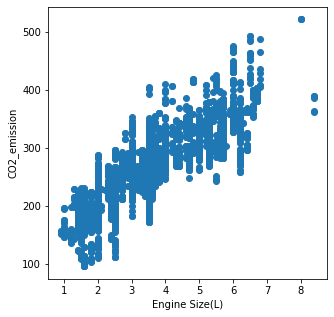

(array([ 945,  946, 1431, 2544, 3616, 4509, 5575, 6640]),)


In [220]:
#check outliners 

#boxplot for  
sns.boxplot(dataset['Engine Size(L)'])
#scatter plot
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(dataset['Engine Size(L)'], dataset['CO2_emission'])
# x-axis label
ax.set_xlabel('Engine Size(L)')
# y-axis label
ax.set_ylabel('CO2_emission')
plt.show()

#position of outlier
print(np.where((dataset['Engine Size(L)']>7.5)))
#can try outliers from interquatlie and z score also 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



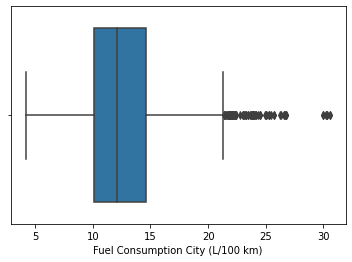

In [221]:
#check outliners 
#boxplot 
sns.boxplot(dataset['Fuel Consumption City (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



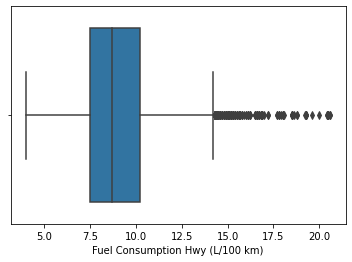

In [222]:
sns.boxplot(dataset['Fuel Consumption Hwy (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



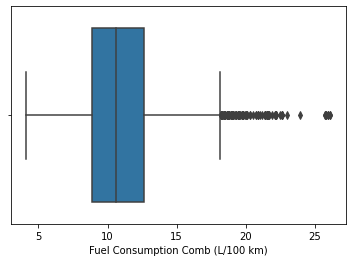

In [223]:
sns.boxplot(dataset['Fuel Consumption Comb (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



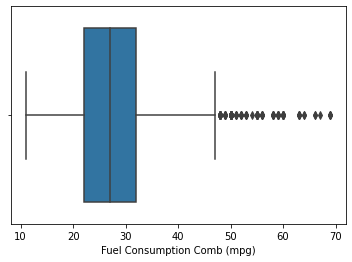

In [224]:
sns.boxplot(dataset['Fuel Consumption Comb (mpg)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



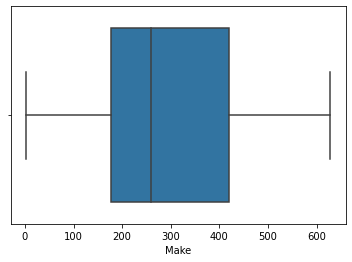

In [225]:
sns.boxplot(dataset['Make'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



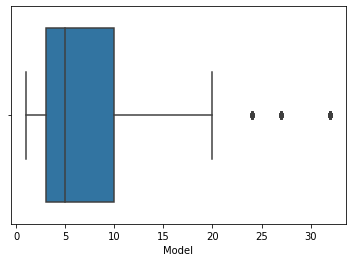

In [226]:
sns.boxplot(dataset['Model'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



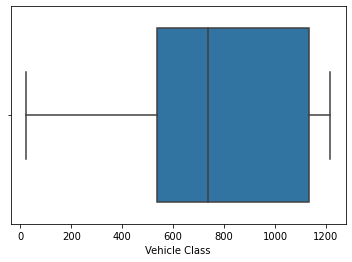

In [227]:
sns.boxplot(dataset['Vehicle Class']) # boxplot for vehicle class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



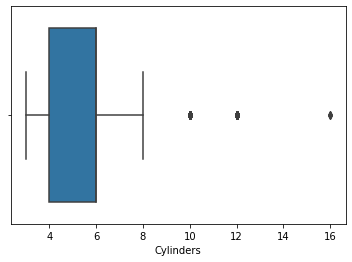

In [228]:
sns.boxplot(dataset['Cylinders']) # box plot for Cylinders

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



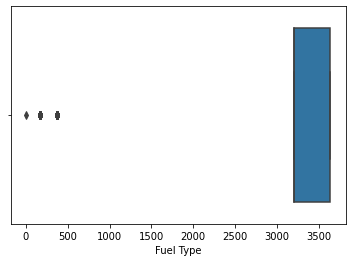

In [229]:
sns.boxplot(dataset['Fuel Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



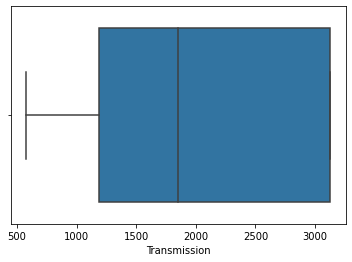

In [230]:
sns.boxplot(dataset['Transmission'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 349, 1743, 2434, 2663, 2873, 2971, 3959, 3961, 4049, 4509, 5025,
       5026, 5027, 5028, 5126, 5511, 5575, 6045, 6046, 6640, 7058, 7059]),)


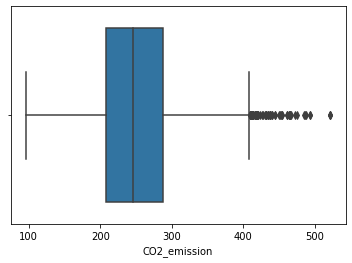

In [231]:
sns.boxplot(dataset['CO2_emission'])
#position of outlier
print(np.where((dataset['CO2_emission']>450)))

In [232]:
# checking for unique variables
print(dataset['Make'].unique())
print("\n")
print(dataset['Model'].unique())
print("\n")
print(dataset['Vehicle Class'].unique())
print("\n")
print(dataset['Fuel Type'].unique())
print("\n")
print(dataset['Transmission'].unique())

[ 72  30  47 286  46 527 103 158 588  88 246  73 628 328 214 210 108 160
 251 231  41  85 178  96  61 180 419 204  95 259 376  97  50  22   7   2
 140 330 197 124  25   3]


[ 9  2  1  7  3  4  6  5 10  8 11 19 18 14 12 20 16 13 32 24 27 17 15]


[1022 1217 1133  460  326  606  639  252  735   22   66  538   80   77
   53  159]


[3202  175 3637  370    1]


[3127 1185  576  646 1851]


basic values like mean, median, standard deviation, minimum, maximum, quatile range

correlation coeiffient values among the features to know the dependence will help us decide the main features while modelling the data

Using scatter plots and other graphical representation to know the distribution and dependence.


In [233]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Make,7385.0,309.638592,179.579527,2.0,178.0,259.0,419.0,628.0
Model,7385.0,6.615166,5.258877,1.0,3.0,5.0,10.0,32.0
Vehicle Class,7385.0,790.944753,347.960208,22.0,538.0,735.0,1133.0,1217.0
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Transmission,7385.0,2079.573053,980.957250,576.0,1185.0,1851.0,3127.0,3127.0
Fuel Type,7385.0,3202.179959,844.764158,1.0,3202.0,3202.0,3637.0,3637.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1


In [234]:
dataset.corr()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
Make,1.000000,0.191431,-0.152917,0.089915,0.066697,0.069306,-0.132271,0.122374,0.144939,0.132202,-0.127540,0.091817,0.102624
Model,0.191431,1.000000,-0.047217,-0.037081,-0.088978,-0.053057,-0.026278,-0.004510,-0.001681,-0.003424,-0.009298,-0.072839,-0.087623
Vehicle Class,-0.152917,-0.047217,1.000000,-0.240058,-0.239453,0.091499,0.108620,-0.274098,-0.299533,-0.286403,0.250957,-0.283330,-0.220860
Engine Size(L),0.089915,-0.037081,-0.240058,1.000000,0.927653,0.125377,-0.144393,0.831379,0.761526,0.817060,-0.757854,0.851145,0.747118
Cylinders,0.066697,-0.088978,-0.239453,0.927653,1.000000,0.127652,-0.137174,0.800702,0.715252,0.780534,-0.719321,0.832644,0.710114
Transmission,0.069306,-0.053057,0.091499,0.125377,0.127652,1.000000,-0.071469,0.195287,0.162608,0.185390,-0.255271,0.203086,0.203010
Fuel Type,-0.132271,-0.026278,0.108620,-0.144393,-0.137174,-0.071469,1.000000,-0.352517,-0.354545,-0.357420,0.251902,-0.118145,-0.088933
Fuel Consumption City (L/100 km),0.122374,-0.004510,-0.274098,0.831379,0.800702,0.195287,-0.352517,1.000000,0.948180,0.993810,-0.927059,0.919592,0.795626
Fuel Consumption Hwy (L/100 km),0.144939,-0.001681,-0.299533,0.761526,0.715252,0.162608,-0.354545,0.948180,1.000000,0.977299,-0.890638,0.883536,0.767552
Fuel Consumption Comb (L/100 km),0.132202,-0.003424,-0.286403,0.817060,0.780534,0.185390,-0.357420,0.993810,0.977299,1.000000,-0.925576,0.918052,0.795531


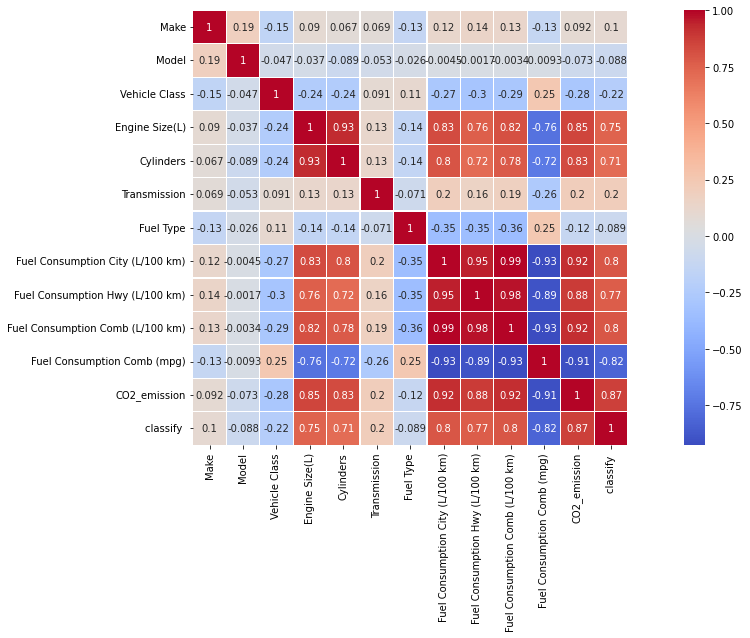

In [235]:
plt.figure(figsize=(20,8)) #showing correlation  map
sns.heatmap(data=dataset.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)

In [236]:
dataset.corr()['CO2_emission'].sort_values()

Fuel Consumption Comb (mpg)        -0.907426
Vehicle Class                      -0.283330
Fuel Type                          -0.118145
Model                              -0.072839
Make                                0.091817
Transmission                        0.203086
Cylinders                           0.832644
Engine Size(L)                      0.851145
classify                            0.870707
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2_emission                        1.000000
Name: CO2_emission, dtype: float64

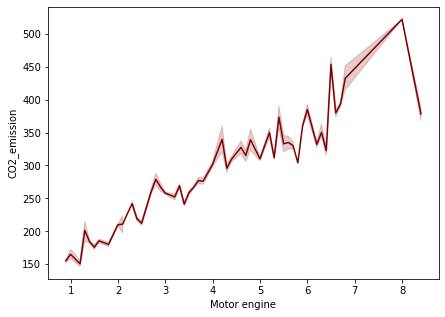

In [237]:
#Line Plot for Engine Size vs Emission
plt.figure(figsize=(7,5))
sns.lineplot(x=dataset['Engine Size(L)'], y=dataset['CO2_emission'], color = 'maroon')
plt.xlabel('Motor engine')
plt.ylabel('CO2_emission')
plt.show()

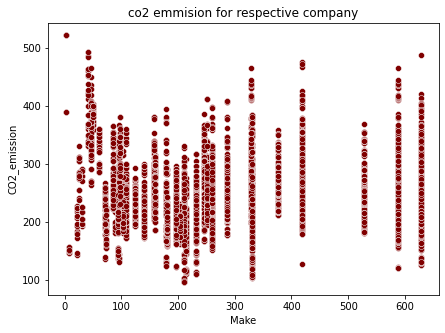

In [238]:
# Scatter Plot for Make vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Make', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective company')
plt.show()

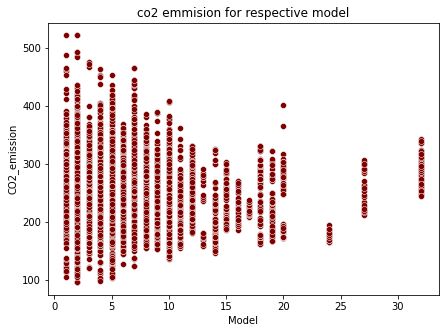

In [239]:
# Scatter Plot for Model vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Model', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective model')
plt.show()

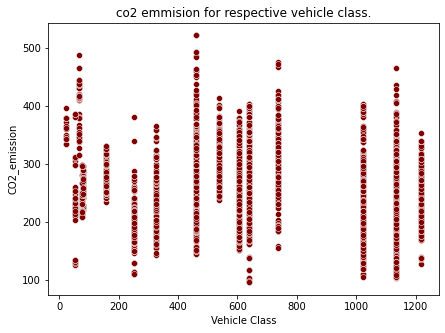

In [240]:
# Scatter Plot for Vehicle Class vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Vehicle Class', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective vehicle class.')
plt.show()

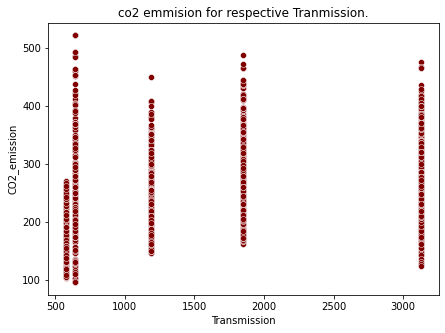

In [241]:
# Scatter Plot for Transmssion vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Transmission', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective Tranmission.')
plt.show()

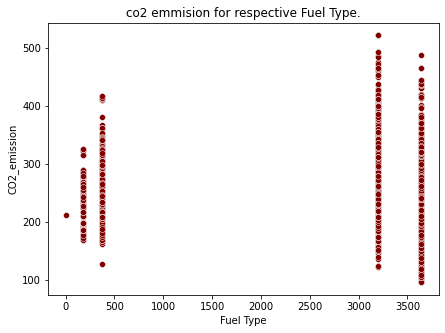

In [242]:
# Scatter Plot for Fuel Type vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Type', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective Fuel Type.')
plt.show()

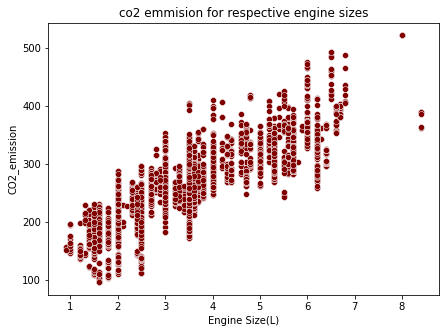

In [243]:
# Scatter Plot for Engine size vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective engine sizes')
plt.show()

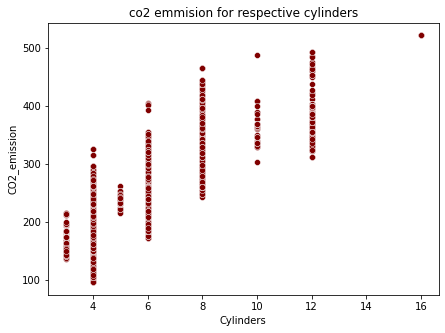

In [244]:
# Scatter Plot for Cylinders vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Cylinders', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective cylinders')
plt.show()

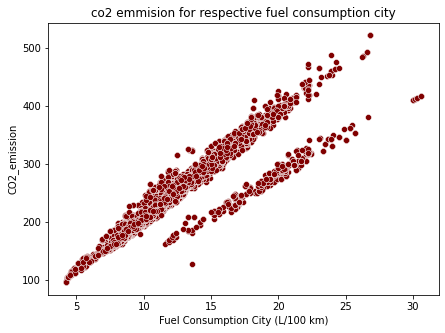

In [245]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption City (L/100 km)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective fuel consumption city')
plt.show()

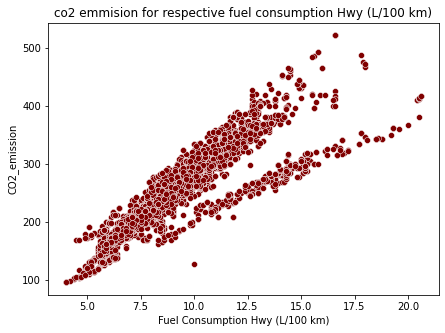

In [246]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Hwy (L/100 km)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective fuel consumption Hwy (L/100 km)')
plt.show()

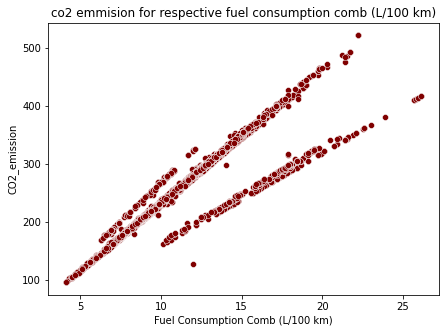

In [247]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Comb (L/100 km)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective fuel consumption comb (L/100 km)')
plt.show()

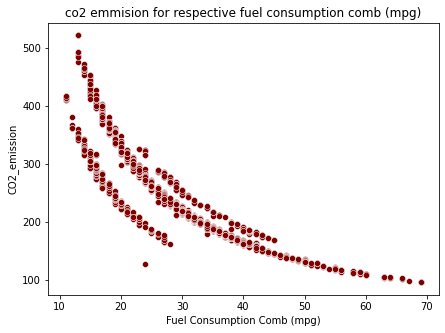

In [248]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Comb (mpg)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective fuel consumption comb (mpg)')
plt.show()

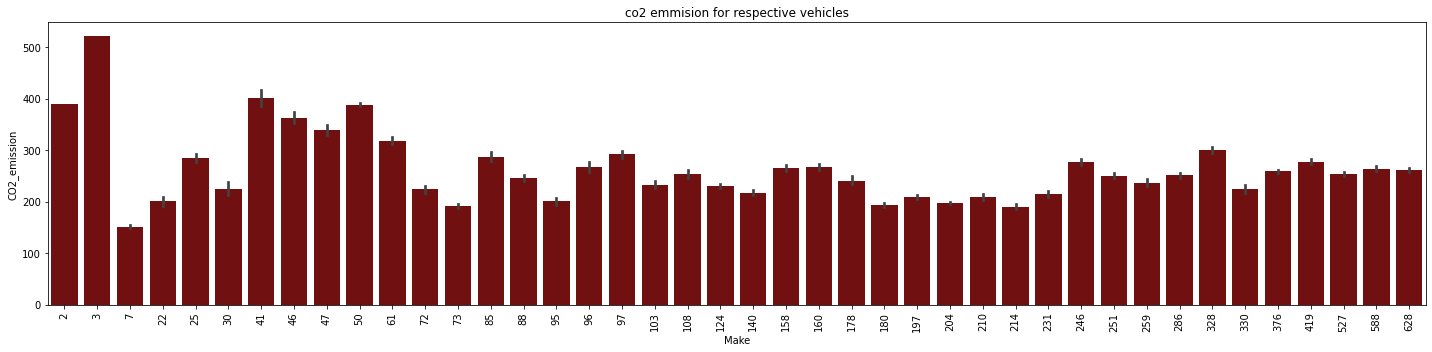

In [249]:
#BarPlot for Company manufacturing Vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values(ascending=False)
ax = sns.barplot(data=dataset,x='Make', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective vehicles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

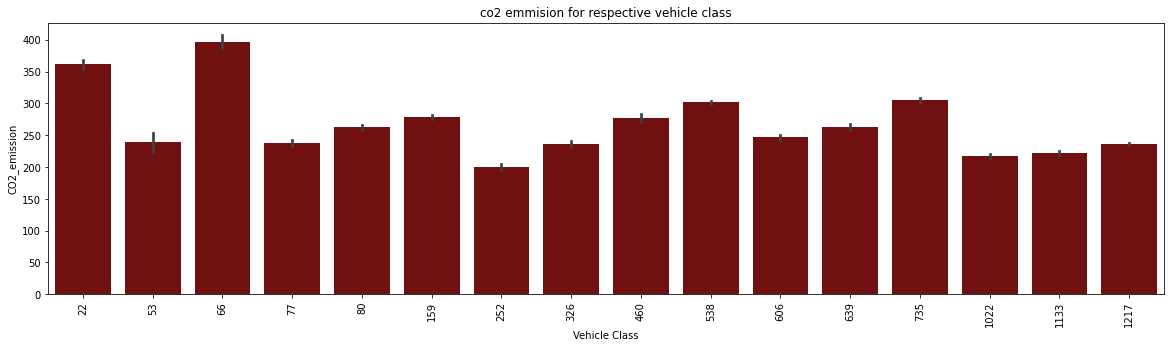

In [250]:
#BarPlot for Vehicle Class vs. Emission
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Vehicle Class', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective vehicle class')
plt.xticks(rotation=90)
plt.show()

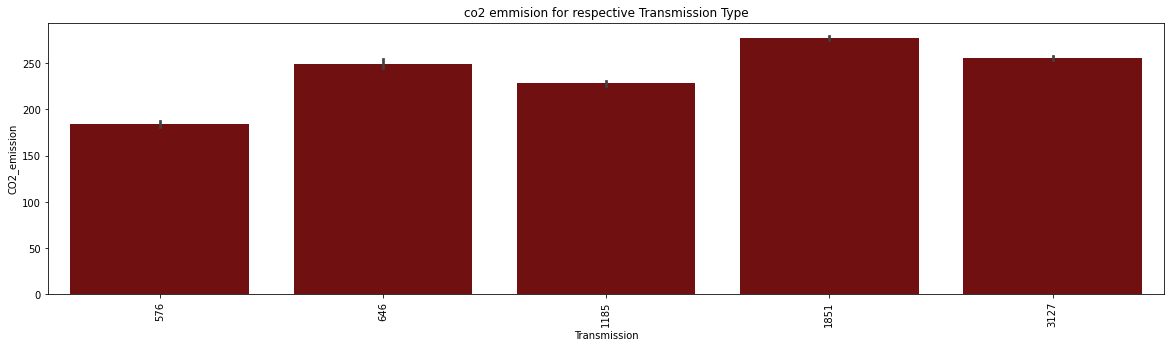

In [251]:
#Barplot for Transmission  vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Transmission', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective Transmission Type')
plt.xticks(rotation=90)
plt.show()

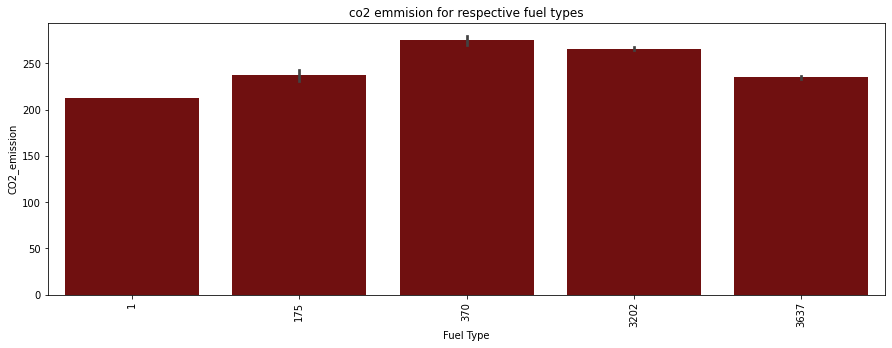

In [252]:
#BarPlot for FUel type vs. Emission
f, ax = plt.subplots(figsize=(15,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Fuel Type', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective fuel types')
plt.xticks(rotation=90)
plt.show()

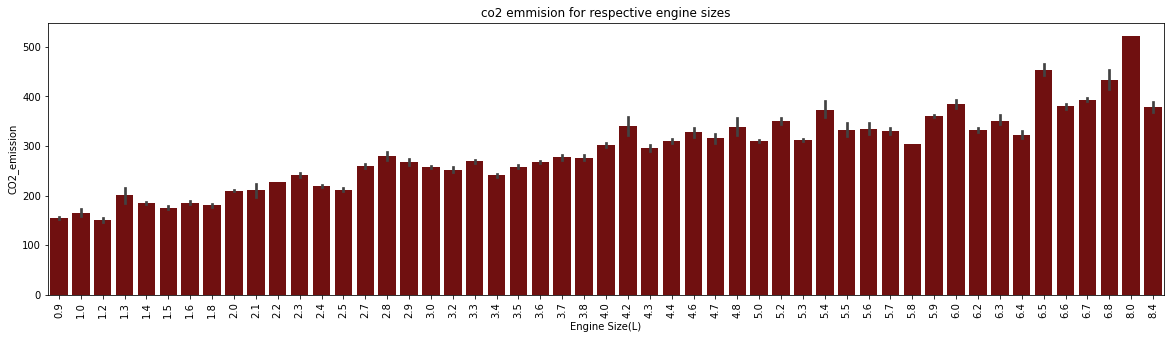

In [253]:
#Barplot for Engine Size(L) vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Engine Size(L)', y='CO2_emission',color='maroon')
plt.title('co2 emmision for respective engine sizes')
plt.xticks(rotation=90)
plt.show()

Data Distribution for each feature 

In [254]:
cel =dataset['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()

In [255]:
cel =dataset['Fuel Type'].value_counts().reset_index()
fig = px.pie(cel, values='Fuel Type', names='index')
fig.update_layout(title="Fuel Type")
fig.show()

In [256]:
cel =dataset['Engine Size(L)'].value_counts().reset_index()
fig = px.pie(cel, values='Engine Size(L)', names='index')
fig.update_layout(title="Engine Size(L)")
fig.show()

In [257]:
cel =dataset['Make'].value_counts().reset_index()
fig = px.pie(cel, values='Make', names='index')
fig.update_layout(title="Make")
fig.show()

In [258]:
cel =dataset['Vehicle Class'].value_counts().reset_index()
fig = px.pie(cel, values='Vehicle Class', names='index')
fig.update_layout(title="Vehicle Class")
fig.show()

In [259]:
cel =dataset['Transmission'].value_counts().reset_index()
fig = px.pie(cel, values='Transmission', names='index')
fig.update_layout(title="Transmission")
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f379a2026d0>,
      dtype=object)

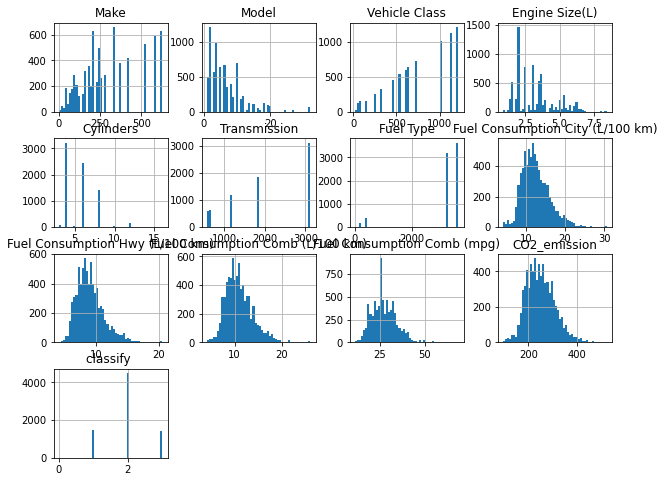

In [260]:
dataset.hist(figsize=(10,8),bins=50)

####  FREQUENCY DISTRIBUTION

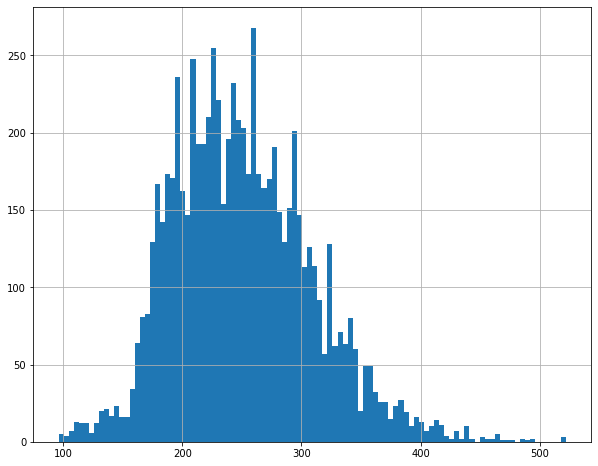

In [261]:
dataset['CO2_emission'].hist(figsize=(10,8),bins=100)#plotting histogram

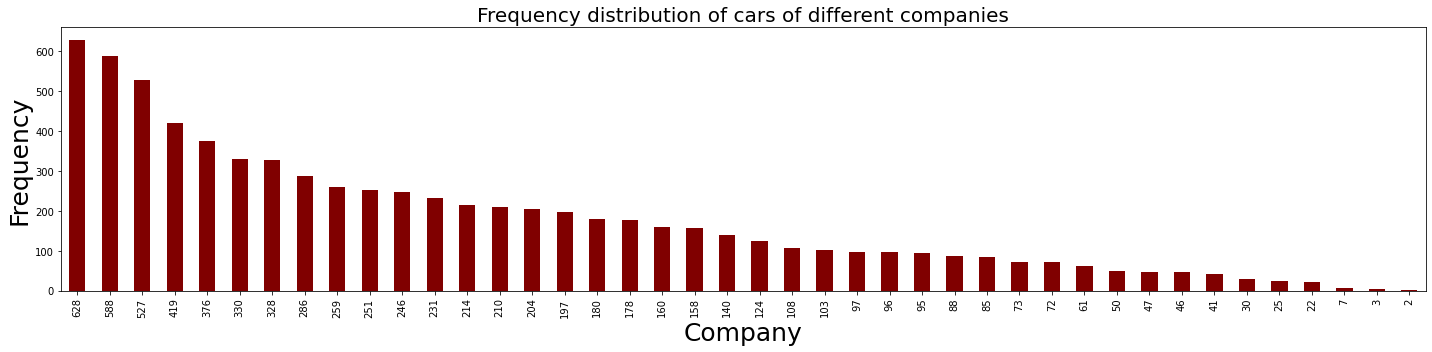

In [262]:
plt.figure(figsize=(20,5))
dataset.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of cars of different companies', fontsize=20)
plt.xlabel('Company', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() #showing frequency distribution

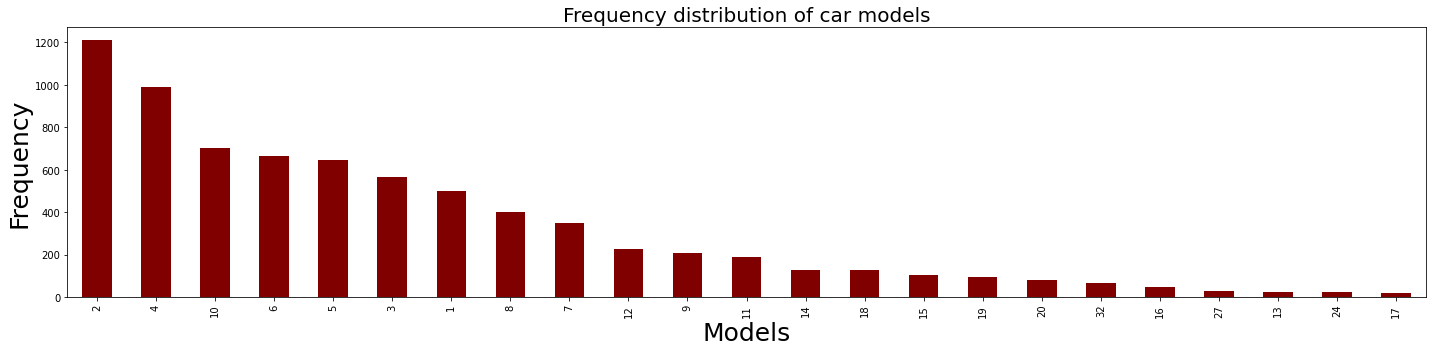

In [263]:
plt.figure(figsize=(20,5))
dataset.groupby('Model')['Model'].count().sort_values(ascending=False)[:50].plot(kind='bar',color='maroon')
plt.title('Frequency distribution of car models', fontsize=20)
plt.xlabel('Models', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

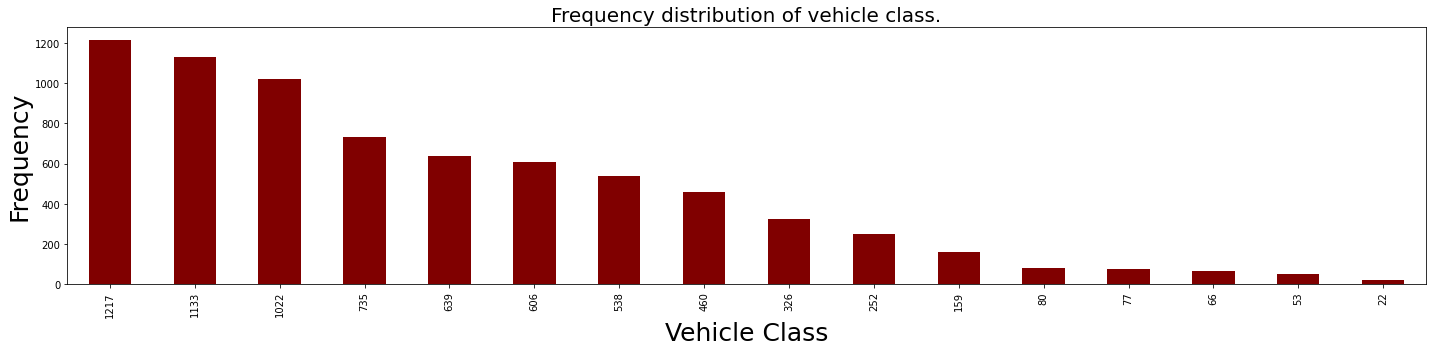

In [264]:
plt.figure(figsize=(20,5))
dataset.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of vehicle class.', fontsize=20)
plt.xlabel('Vehicle Class', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

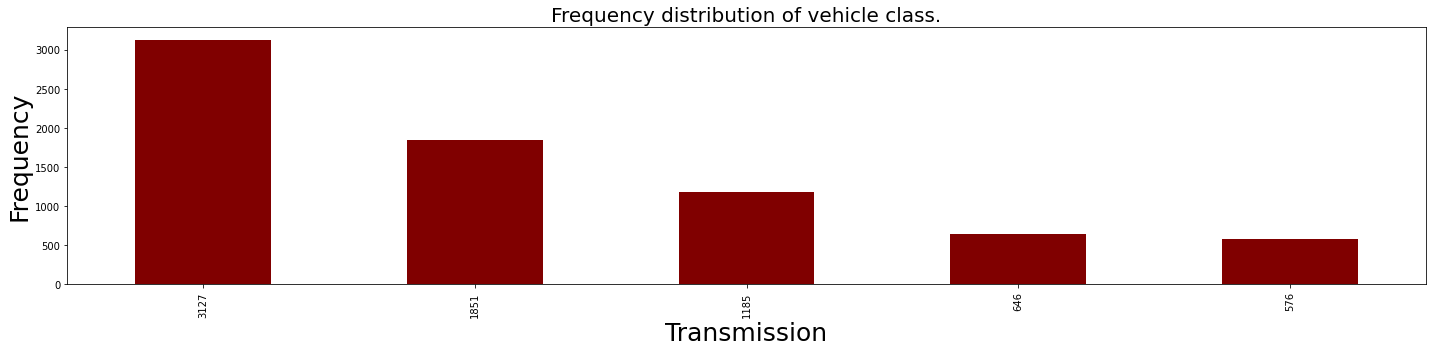

In [265]:
plt.figure(figsize=(20,5))
dataset.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of vehicle class.', fontsize=20)
plt.xlabel('Transmission', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

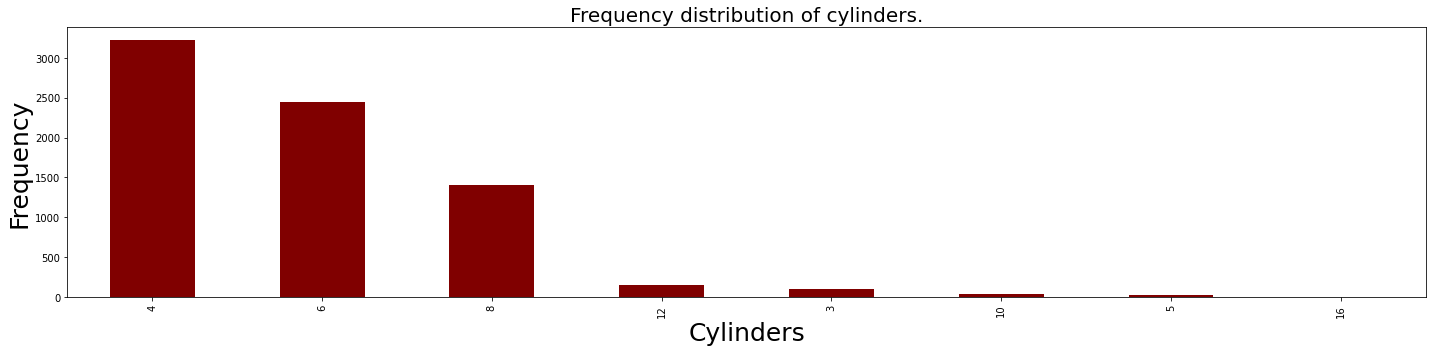

In [266]:
plt.figure(figsize=(20,5))
dataset.groupby('Cylinders')['Cylinders'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of cylinders.', fontsize=20)
plt.xlabel('Cylinders', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

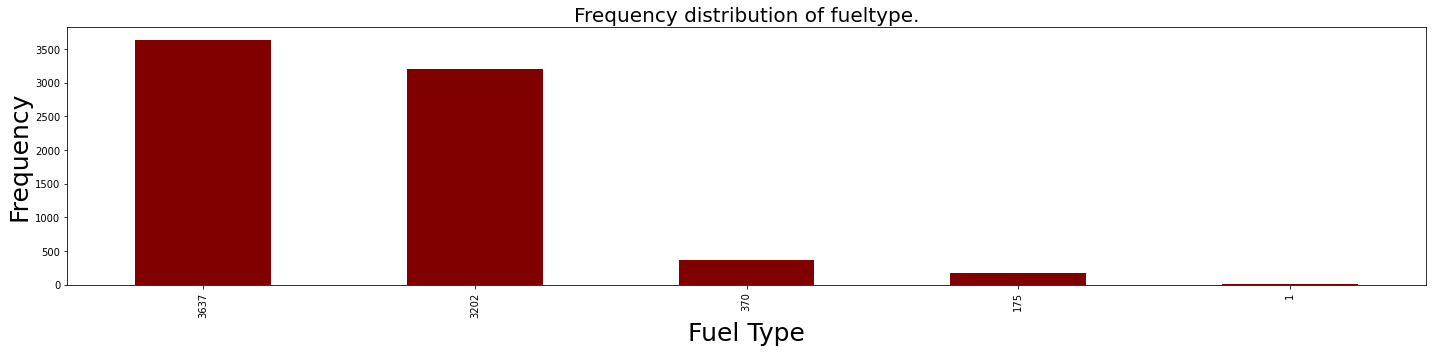

In [267]:
plt.figure(figsize=(20,5))
dataset.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of fueltype.', fontsize=20)
plt.xlabel('Fuel Type', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####DATA - rough

In [268]:
# linear regression and plotting results on train set
from sklearn.preprocessing import StandardScaler
X = dataset[['Engine Size(L)','Cylinders',
            'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)',
             'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)']]
y = dataset['CO2_emission']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [269]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))
lin_pred

18.37575536976214


,pred_values,real_values
0,249.53,241.0
1,203.67,229.0
2,261.48,253.0
3,189.31,183.0
4,242.98,231.0
...,...,...
1472,307.68,297.0
1473,304.86,248.0
1474,235.08,242.0
1475,146.64,138.0


mean diff:  11.35


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



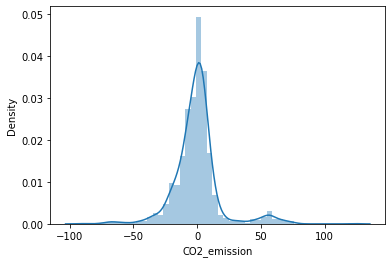

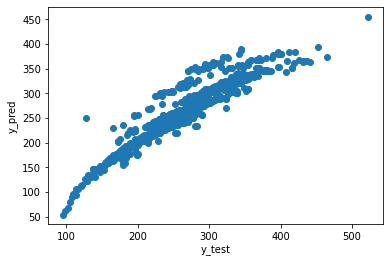

In [270]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])
print('mean diff: ', round(abs(lin_pred['diff']).mean(),2))
sns.distplot(y_pred-y_test)
plt.show()
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()